In [0]:
# The OpenCV library contains mechanisms to do face detection on
# images. The technique used is based on Haar cascades, which is a machine learning approach.
# Applied Data Science with Python which you can take after this if you're interested in that topic.
# OpenCV comes with trained models for detecting faces, eyes, and smiles 

# First step is to load opencv and the XML-based classifiers

In [0]:
# we dont need to install opencv in coab
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')


In [36]:
from IPython.display import display
from google.colab import files
#uploaded = files.upload()

img = cv.imread('floyd.jpg')
#convert to greyscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# The next step is to use the face_cascade classifier. I'll let you go explore the docs if you
# would like to, but the norm is to use the detectMultiScale() function. This function returns
# a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray)
# And lets just print those faces out to the screen
faces

array([[158,  75, 176, 176]], dtype=int32)

In [37]:
faces.tolist()[0]

[158, 75, 176, 176]

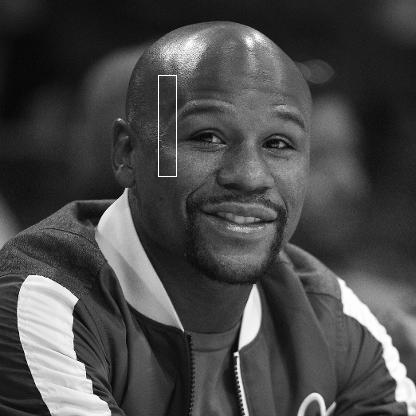

In [38]:
# The resulting rectangles are in the format of (x,y,w,h) where x and y denote the upper
from PIL import Image
pil_img=Image.fromarray(gray,mode="L")

from PIL import ImageDraw
drawing=ImageDraw.Draw(pil_img)

# Now lets pull the rectangle out of the faces object
rec=faces.tolist()[0]

# Now we just draw a rectangle around the bounds
drawing.rectangle(rec, outline="white")

# And display
display(pil_img)

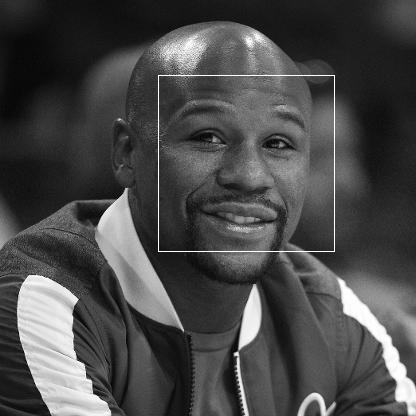

In [39]:
# So, not quite what we were looking for. What do you think went wrong?
# Well, a quick double check of the docs and it is apparent that OpenCV is return the coordinates
# as (x,y,w,h), while PIL.ImageDraw is looking for (x1,y1,x2,y2). Looks like an easy fix
# Wipe our old image
pil_img=Image.fromarray(gray,mode="L")
drawing=ImageDraw.Draw(pil_img)
drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white")
display(pil_img)

In [0]:
#converting gif to png image
pil_img=Image.open('msi_recruitment.gif')
# now lets convert it to greyscale for opencv, and get the bytestream
open_cv_version=pil_img.convert("L")
# now lets just write that to a file
open_cv_version.save("msi_recruitment.png")


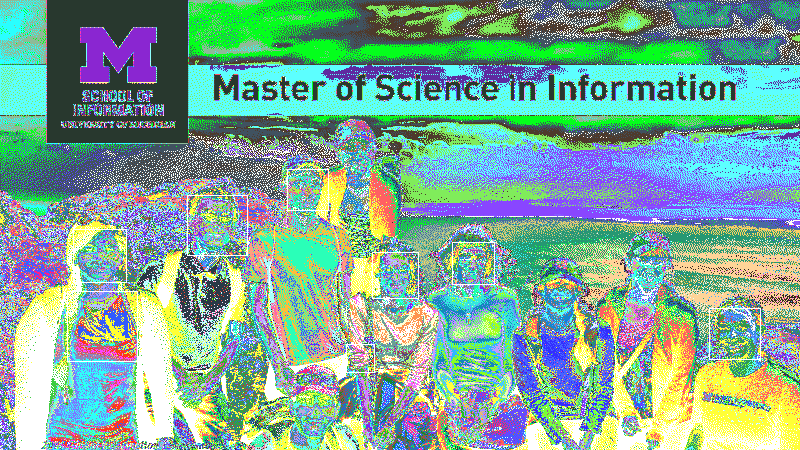

In [43]:
# Ok, now that the conversion of format is done, lets try reading this back into opencv
cv_img=cv.imread('msi_recruitment.png')
# lets try and detect faces in that image
faces = face_cascade.detectMultiScale(cv_img)

# Now, we still have our PIL color version in a gif
pil_img=Image.open('msi_recruitment.gif')
# Set our drawing context
drawing=ImageDraw.Draw(pil_img)

# For each item in faces, lets surround it with a red box
for x,y,w,h in faces:
    drawing.rectangle((x,y,x+w,y+h), outline="white")
display(pil_img)

In [44]:
# Who knew there was so much to learn about image formats? We can see what mode the image
# is in with the .mode attribute
pil_img.mode

'P'

In [45]:
pil_img=Image.open('msi_recruitment.gif')
#convert it to RGB mode
pil_img = pil_img.convert("RGB")
#print out the mode
pil_img.mode

'RGB'

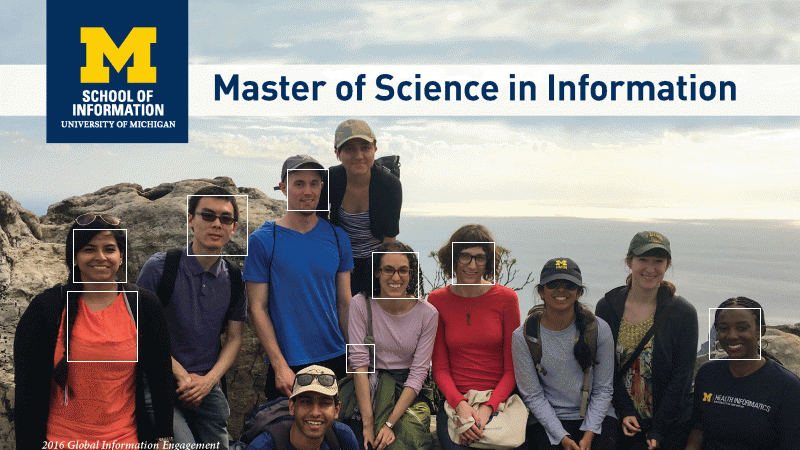

In [46]:
# Ok, now lets go back to drawing rectangles. Lets get our drawing object
drawing=ImageDraw.Draw(pil_img)
# And iterate through the faces sequence, tuple unpacking as we go
for x,y,w,h in faces:
    # And remember this is width and height so we have to add those appropriately.
    drawing.rectangle((x,y,x+w,y+h), outline="white")
display(pil_img)

In [0]:
def show_rects(faces):
    #Lets read in our gif and convert it
    pil_img=Image.open('msi_recruitment.gif').convert("RGB")
    # Set our drawing context
    drawing=ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    #Finally lets display this
    display(pil_img)

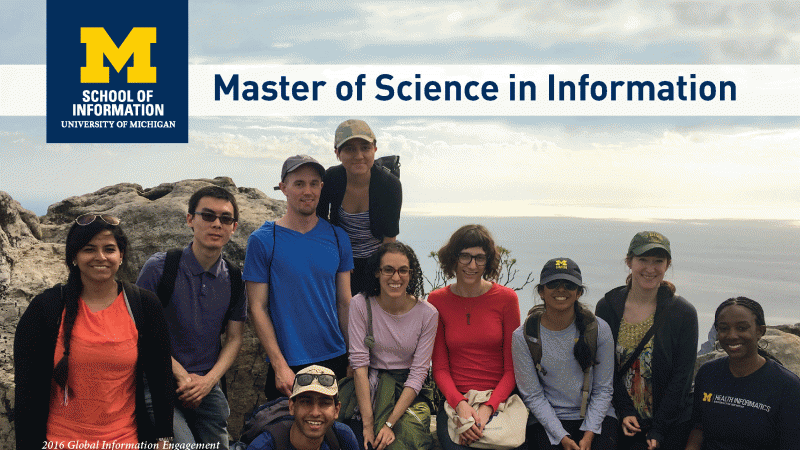

In [48]:
# Ok, first up, we could try and binarize this image. It turns out that opencv has a built in
# binarization function called threshold(). You simply pass in the image, the midpoint, and
# the maximum value, as well as a flag which indicates whether the threshold should be
# binary or something else. 
cv_img_bin=cv.threshold(img,120,255,cv.THRESH_BINARY)[1] # returns a list, we want the second value
# Now do the actual face detection
faces = face_cascade.detectMultiScale(cv_img_bin)
# Now lets see the results
show_rects(faces)

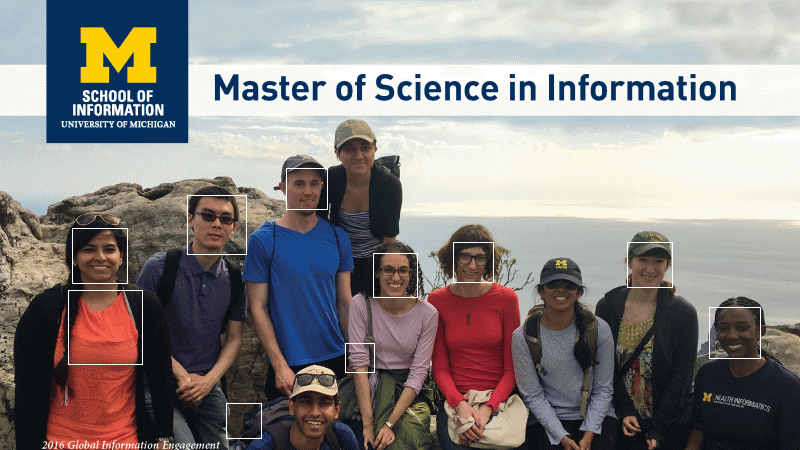

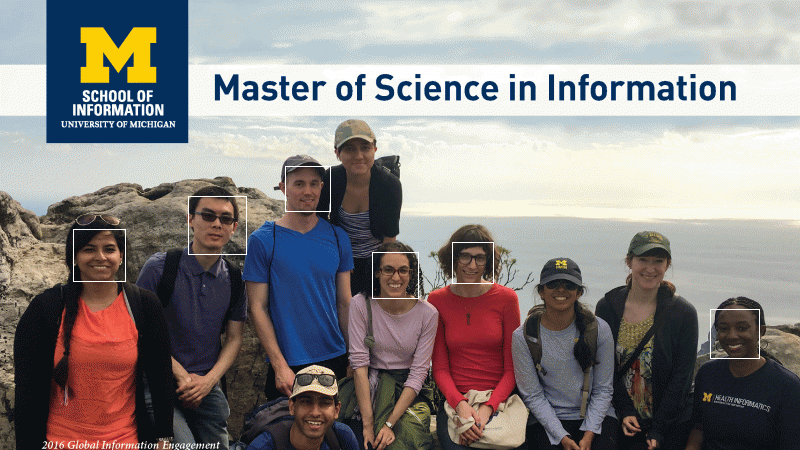

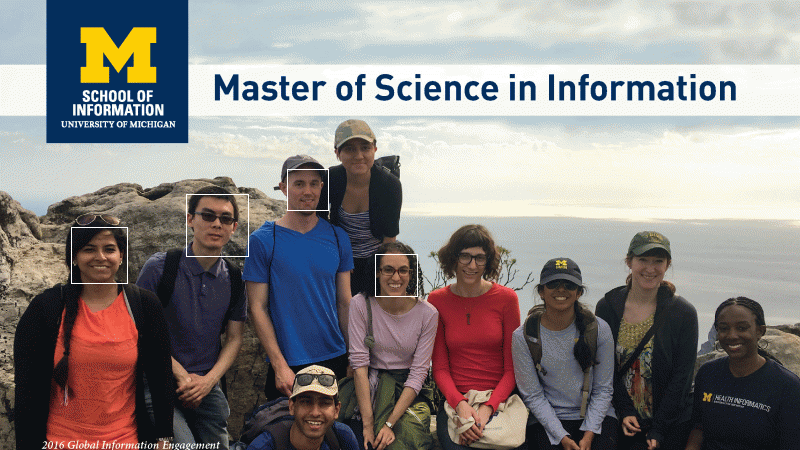

In [49]:
# The detectMultiScale() function from OpenCV also has a couple of parameters. The first of
# these is the scale factor. The scale factor changes the size of rectangles which are
# considered against the model, that is, the haarcascades XML file. You can think of it as if
# it were changing the size of the rectangles which are on the screen.
faces = face_cascade.detectMultiScale(cv_img,1.05)
# Show those results
show_rects(faces)
faces = face_cascade.detectMultiScale(cv_img,1.15)
show_rects(faces)
faces = face_cascade.detectMultiScale(cv_img,1.25)
show_rects(faces)

In [50]:
# Lets time the speed of detectmultiscale when using a scale of 1.05
%timeit face_cascade.detectMultiScale(cv_img,1.05)

1 loop, best of 3: 476 ms per loop


In [51]:
# Ok, now lets compare that to the speed at scale = 1.15
%timeit face_cascade.detectMultiScale(cv_img,1.15)

1 loop, best of 3: 184 ms per loop
